In [23]:
##### This example shows how to plot the trajectories of the particles
##### of a Particle Swarm Optimization run


import numpy as np
import os,sys

path_discoveri = "/Users/francescomassimo/Codes/Optimization_on_cluster/Discoveri"
sys.path.insert(0, path_discoveri)

# import Discoveri class
from discoveriMain import createOptimizationRun

####################################################################
####### Parameters for a generic optimization method ###############
####################################################################

#### Parameter space to explore
number_of_dimensions               = 2 
search_interval                    = [[-2,2],[-2,2]]
input_parameters_names             = ["dim0","dim1"]

number_of_samples_per_iteration    = 5

#### Optimization parameters
number_of_iterations               = 10 

#### Diagnostic and output dump periodicity
iterations_between_outputs         = 100

#### Flag used to set if a numpy function or simulation results are optimized: 
#### if True it optimizes (i.e. maximizes) a numpy function defined in test_function
use_test_function                  = True

test_function                      = None
simulation_postprocessing_function = None

def my_test_function(X): 
    y = np.square(X) - 10*np.cos(X-2*np.ones(np.size(X)))
    return -np.sum(y)
    
test_function                      = my_test_function


starting_directory = ""

############# Choose the Optimization method #############

optimization_method                = "FST-PSO" 


##########################################################
################# Run the optimization ###################
##########################################################


if __name__ == '__main__':
    
    starting_directory = os.getcwd()
    # initialize an optimization run 
    # the optimizer hyperparameters will be the default ones
    optimization_run   = createOptimizationRun(starting_directory              = starting_directory,               \
                                               optimization_method             = optimization_method,              \
                                               number_of_samples_per_iteration = number_of_samples_per_iteration,  \
                                               number_of_dimensions            = number_of_dimensions,             \
                                               search_interval                 = search_interval,                  \
                                               number_of_iterations            = number_of_iterations,             \
                                               use_test_function               = use_test_function,                \
                                               test_function                   = test_function,                    \
                                               iterations_between_outputs      = iterations_between_outputs,       \
                                               input_parameters_names          = input_parameters_names,           \
                                               )
    # execute optimization run
    optimization_run.execute()

                                                                                  
             _____    _                                              _            
         _  |  __ \  (_)                                            (_)           
        (_) | |  | |  _   ___    ___    ___   __   __   ___   _ __   _            
         _  | |  | | | | / __|  / __|  / _ \  \ \ / /  / _ \ | '__| | |           
        (_) | |__| | | | \__ \ | (__  | (_) |  \ V /  |  __/ | |    | |           
            |_____/  |_| |___/  \___|  \___/    \_/    \___| |_|    |_|           
                                                                                  
           Data-driven Investigation through Simulations on Clusters              
  for the Optimization of the physical Variables' Effects in Regimes of Interest  
                                                                                  
                                                                                  

 In

# Plot the trajectories of the swarm particles

<Figure size 640x480 with 0 Axes>

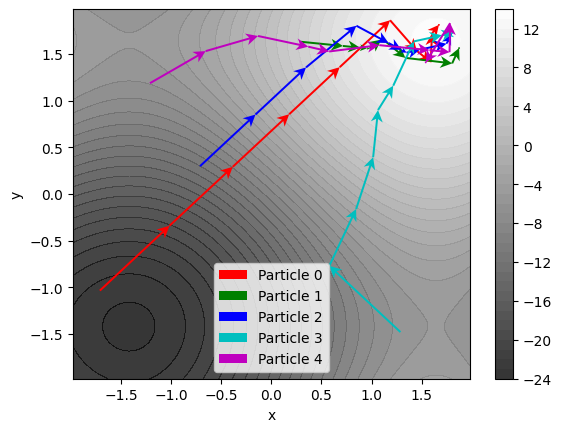

In [28]:
import matplotlib.pyplot as plt

# Compute the optimized test function values on the search interval
x_mesh = np.linspace(search_interval[0][0],search_interval[0][1],num=100)
y_mesh = np.linspace(search_interval[1][0],search_interval[1][1],num=100)
x_meshgrid,y_meshgrid = np.meshgrid(x_mesh,y_mesh,indexing='ij')

xy_pairs = np.stack([x_meshgrid, y_meshgrid], axis=-1)
z_values = np.apply_along_axis(my_test_function, -1, xy_pairs)

# Plot the test function values
plt.figure();plt.ion();plt.show()
extent = [search_interval[0][0], search_interval[0][1], search_interval[1][0], search_interval[1][1]]
plt.contourf(z_values.T, extent=extent, origin='lower',cmap="gray",alpha=0.8,levels=40)
plt.xlabel("x");plt.ylabel("y");plt.colorbar()

# load the optimization history
filename             = "history_particles_positions_and_function_values.npy" # complete history
history_particles_positions_and_function_values = np.load(filename)


# plot the trajectory of each particle
colors = ["r","g","b","c","m"]
for iparticle in range(number_of_samples_per_iteration):
    # extract the positions explored by the particle
    x_particle  = history_particles_positions_and_function_values[:,iparticle,0]
    y_particle  = history_particles_positions_and_function_values[:,iparticle,1]
    # compute velocity components at each iteration (except the last one)
    vx_particle = np.zeros(np.size(history_particles_positions_and_function_values[:,iparticle,0]))
    vy_particle = np.zeros(np.size(history_particles_positions_and_function_values[:,iparticle,0]))
    for iteration in range(np.size(history_particles_positions_and_function_values[:,iparticle,0])-1):
        vx_particle[iteration] = x_particle[iteration+1]-x_particle[iteration]
        vy_particle[iteration] = y_particle[iteration+1]-y_particle[iteration]
    # plot the trajectory
    plt.quiver(x_particle,y_particle,vx_particle,vy_particle,label="Particle "+str(iparticle),angles='xy', scale_units='xy', scale=1, 
           width=0.005, headwidth=6, headlength=6,color=colors[iparticle])
plt.legend();

